In [1]:
from PIL import Image
import json
import os
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import numpy as np
from scipy.stats import gaussian_kde
import time
import math
import pickle

In [2]:
# inatilize data for holding image data

# dictionay to hold pixel data for each color 
dog_pixels = {'R':[], 'G':[], 'B':[], 'R2': [], 'G2':[], 'B2':[]}
background_pixels = {'R':[], 'G':[], 'B':[], 'R2': [], 'G2':[], 'B2':[]}

# where the images and masks are kept
img_dir = "Images\\"
label_dir = "Masks\\"

In [3]:
for img in os.listdir(img_dir):
    # open RBG image of dog
    test_image = Image.open(img_dir + img)
    
    # use the name of the open image to find the name of the label image
    label_name = img.split('.')[0] + ".png"
    
    # open black and white label image
    test_label = Image.open(label_dir + label_name)
    
    # load pixel data for each 
    img_pixels = test_image.load()
    label_pixels = test_label.load()
    
    # look through every pixel in each dimention of the image
    for i in range(0, test_image.size[0]):
        for j in range(0, test_image.size[1]):
            # edge of image = (3,3,3), dog =(1,1,1)
            if label_pixels[i,j] == 1 or label_pixels[i,j] == 3: 
                dog_pixels['R'].append(img_pixels[i,j][0])
                dog_pixels['G'].append(img_pixels[i,j][1])
                dog_pixels['B'].append(img_pixels[i,j][2])
                
                dog_pixels['R2'].append(img_pixels[i,j][0]**2)
                dog_pixels['G2'].append(img_pixels[i,j][1]**2)
                dog_pixels['B2'].append(img_pixels[i,j][2]**2)
                
            # background pixels = (2,2,2)
            else:
                background_pixels['R'].append(img_pixels[i,j][0])
                background_pixels['G'].append(img_pixels[i,j][1])
                background_pixels['B'].append(img_pixels[i,j][2])
                
                background_pixels['R2'].append(img_pixels[i,j][0]**2)
                background_pixels['G2'].append(img_pixels[i,j][1]**2)
                background_pixels['B2'].append(img_pixels[i,j][2]**2)
    

In [4]:
# train a model for each dictionary of pixel data for dog images
dog_KDE = {}

dog_KDE['R'] = gaussian_kde(dog_pixels['R'])
dog_KDE['G'] = gaussian_kde(dog_pixels['G'])
dog_KDE['B'] = gaussian_kde(dog_pixels['B'])

dog_KDE['R2'] = gaussian_kde(dog_pixels['R2'])
dog_KDE['G2'] = gaussian_kde(dog_pixels['G2'])
dog_KDE['B2'] = gaussian_kde(dog_pixels['B2'])


11.520708200000001


In [5]:
# train a model for each dictionary of pixel data for background images
background_KDE = {}

background_KDE['R'] = gaussian_kde(background_pixels['R'])
background_KDE['G'] = gaussian_kde(background_pixels['G'])
background_KDE['B'] = gaussian_kde(background_pixels['B'])

background_KDE['R2'] = gaussian_kde(background_pixels['R2'])
background_KDE['G2'] = gaussian_kde(background_pixels['G2'])
background_KDE['B2'] = gaussian_kde(background_pixels['B2'])


15.3484011


In [49]:
# check the model on a test pixel value
test_pixel = (255,255,255)

# background H0
a = background_KDE['R'](test_pixel[0]) * background_KDE['G'](test_pixel[1]) * background_KDE['B'](test_pixel[2])
b = background_KDE['R2'](test_pixel[0]**2) * background_KDE['G2'](test_pixel[1]**2) * background_KDE['B2'](test_pixel[2]**2)

# dog H1
c = dog_KDE['R'](test_pixel[0]) * dog_KDE['G'](test_pixel[1]) * dog_KDE['B'](test_pixel[2])
d = dog_KDE['R2'](test_pixel[0]**2) * dog_KDE['G2'](test_pixel[1]**2) * dog_KDE['B2'](test_pixel[2]**2)

result = math.log10(((a*b)/(c*d)))
result_2 = math.log10((a)/(c))

if result > 0:
    print("Model predicts: Background")
    
elif result < 0:
    print("Model predicts: Dog")
    
    
if result_2 > 0:
    print("Model^2 predicts: Background")
    
elif result_2 < 0:
    print("Model^2 predicts: Dog")

print("Result with squares:", result)
print("Result no squares:", result_2)


Background
Result with squares: 0.1262093305833179
Result no squares: -0.06629906657962546
A: [4.46181781e-09]
B: [1.60065175e-16]
C: [5.19769628e-09]
D: [1.02751568e-16]
A * B [7.14181648e-25]
C * D [5.34071441e-25]


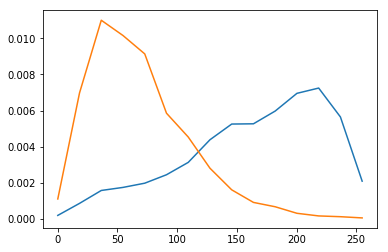

In [16]:
xs = np.linspace(0,255,15)
plt.plot(xs, dog_KDE['R'](xs))
plt.plot(xs, background_KDE['R'](xs))
plt.show()

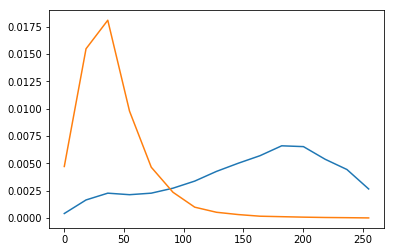

In [17]:
xs = np.linspace(0,255,15)
plt.plot(xs, dog_KDE['B'](xs))
plt.plot(xs, background_KDE['B'](xs))
plt.show()

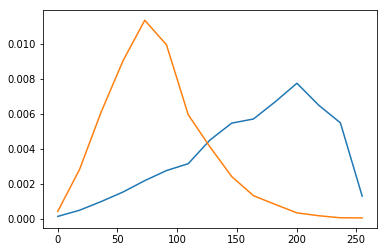

In [18]:
xs = np.linspace(0,255,15)
plt.plot(xs, dog_KDE['G'](xs))
plt.plot(xs, background_KDE['G'](xs))
plt.show()

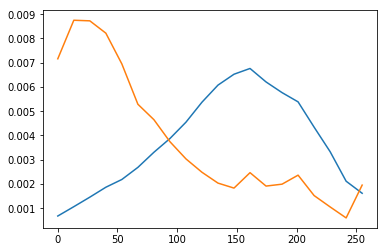

76.36228449999999


In [15]:
t = time.perf_counter()

dog_R_KDE = gaussian_kde(dog_pixels['B'])

xs = np.linspace(0,255,20)
plt.plot(xs, dog_R_KDE(xs))

background_R_KDE = gaussian_kde(background_pixels['B'])
xs = np.linspace(0,255,20)
plt.plot(xs, background_R_KDE(xs))

plt.show()
t_2 = time.perf_counter()

print(t_2 - t)

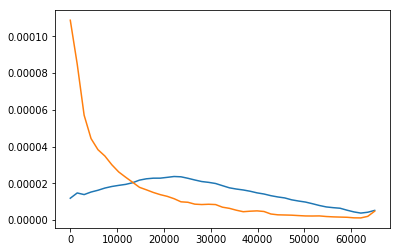

183.80598120000013


In [15]:
dog_R_KDE_2 = gaussian_kde(dog_R_2)

xs = np.linspace(0,(255**2),45)
plt.plot(xs, dog_R_KDE_2(xs))

background_R_KDE_2 = gaussian_kde(background_R_2)
xs = np.linspace(0,(255**2),45)
plt.plot(xs, background_R_KDE_2(xs))

plt.show()

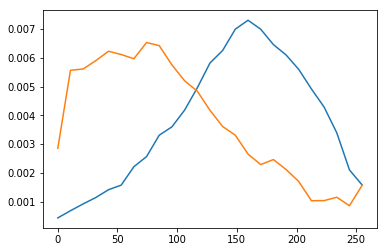

97.35374980000003


In [8]:
t = time.perf_counter()

dog_G_KDE = gaussian_kde(dog_G)

xs = np.linspace(0,255,25)
plt.plot(xs, dog_G_KDE(xs))

background_G_KDE = gaussian_kde(background_G)
xs = np.linspace(0,255,25)
plt.plot(xs, background_G_KDE(xs))

plt.show()
t_2 = time.perf_counter()

print(t_2 - t)

In [11]:
dog_B_KDE = gaussian_kde(dog_B)

background_B_KDE = gaussian_kde(background_B)

plt.show()

3.8170787000000246


In [21]:
# save the pre-computed model to files for faster predictions
t = time.perf_counter()

faster_dog_R = {}
faster_dog_G = {}
faster_dog_B = {}

faster_background_R = {}
faster_background_G = {}
faster_background_B = {}

for i in range(0,256):
    faster_dog_R[i] = dog_R_KDE.pdf(i)
for i in range(0,256):
    faster_dog_G[i] = dog_G_KDE.pdf(i)
for i in range(0,256):
    faster_dog_B[i] = dog_B_KDE.pdf(i)
    
for i in range(0,256):
    faster_background_R[i] = background_R_KDE.pdf(i)
for i in range(0,256):
    faster_background_G[i] = background_G_KDE.pdf(i)
for i in range(0,256):
    faster_background_B[i] = background_B_KDE.pdf(i)
    
t_2 = time.perf_counter()
print(t_2 - t)

3027.9613861
